### PERFOMANCE MEASURES

Different Perfomance Measures.

        + Using CROSS VALIDATION
        
        + CONFUSION MATRIX
        
            + PRECISION AND RECALL
            
            + F1 SCORE
        
            + PRECISION RECALL TRADE OFF
        
        + ROC Curve



In [99]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

The Shape of X set:-- (70000, 784)
The Shape of y set:-- (70000,)


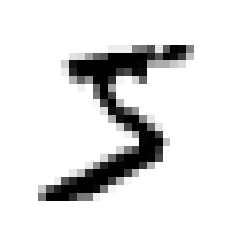

The labels that we are trying to Predict :--- [5 0 4 ... 4 5 6]
The X training set :-- (60000, 784)
The X test set :-- (10000, 784)
The y training set :-- (60000,)
The y test set :-- (10000,)
The labels which are selected when the label is 5:--- [ True False False ...  True False False]
The labels which are selected when the label is 5:--- [False False False ... False  True False]


array([ True])

In [100]:
## fetch data from openml, scikit learn library, datasets.
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version =1)
mnist.keys()

## assigning the keys data and target as X and y
X = mnist["data"]
y = mnist["target"]

## print the X and y shapes.
print("The Shape of X set:--", X.shape)
print("The Shape of y set:--", y.shape)

## take one digit as some of the random digit.
## or for five.
## this will be used in through out the notebook
some_digit = X[0]  ## 28 x 28 pixcel image. A single image.
#print("The digit that we want to predict the model is :--", some_digit)
some_digit_image = some_digit.reshape(28,28) ## reshaping X[0] to 28 x 28
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()  ## plotting the selected figure, or image, here 5

## target values
## checking the target values
y[0]    ## this is float values, so converting to integer in the next step.
## converting the traget value to integers.
y = y.astype(np.uint8)
print("The labels that we are trying to Predict :---", y)

## train test split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print("The X training set :--", X_train.shape)
print("The X test set :--",X_test.shape)
print("The y training set :--",y_train.shape)
print("The y test set :--",y_test.shape)

## prepare the data for ML training.
## took only one class which is 5
## and rest of the numbers are not 5 class.
y_train_5 = (y_train == 5)
print("The labels which are selected when the label is 5:---", y_train_5)
y_test_5 = (y_test == 5)
print("The labels which are selected when the label is 5:---",y_test_5)

## train the SGDClassifier
from sklearn.linear_model import SGDClassifier
## initialize the sgd classifier
sgd_clf = SGDClassifier(random_state = 42)
## fit the X_train and y_train_5 to the model.
sgd_clf.fit(X_train, y_train_5)
## predicting using some image data we defined before.
sgd_clf.predict([some_digit])

**USING CROSS VALIDATION**

+ Here `StratifiedKFold` will do the stratified sampling.
+ At each iteration, the code creates a clone of Classiifier.
+ trains the clone on the training folds.
+ And make predictions on the test folds.
+ then count the number of correct predictions.
+ And give the output as the ratio of Correct Predictions.

+ Here using both Evaluation method of Cross Validation and Using the Scikit Lear cross_val_score.
+ We get the Perfomance of `96%`


Doing Cross Validation without the help of Scikit Learn Library `StratifiedShuffleSplit`.

In [103]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#print(skfolds.split())
for i, (train_index, test_index) in enumerate(skfolds.split(X_train, y_train_5)):
    print(f" Fold : {i}")
    ## initiating clone classifier
    clone_clf = clone(sgd_clf)
    #print(clone)
    ## indexing X_train_folds and y_train_folds from X_train and y_train
    X_train_folds = X_train[train_index]
    #print("Indexed X train folds :--", X_train_folds)
    y_train_folds = y_train_5[train_index]
    #print("Indexed y train folds :--", y_train_folds)
    
    X_test_fold = X_train[test_index]
    #print("Indexed X test fold :--", X_test_fold)
    y_test_fold = y_train_5[test_index]
    #print("Indexed y test fold", y_test_fold)
    
    ## fit the clone model with X_train_folds and y_train_folds
    clone_clf.fit(X_train_folds, y_train_folds)
    ## predict the model using X-test_fold
    y_pred = clone_clf.predict(X_test_fold)
    ## count the number of correct predictions.
    n_correct = sum(y_pred == y_test_fold)
    #print(n_correct)
    print(n_correct/len(y_pred))

 Fold : 0
0.9669
 Fold : 1
0.91625
 Fold : 2
0.96785


Using `cross_val_score() function`, to evaluate the SGDClassifier model using kfold Cross Validation with 3 folds.

In [108]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

Creating a classifier for not 5 class

In [109]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
print(never_5_clf)
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

Never5Classifier()


array([0.91125, 0.90855, 0.90915])

This has almost 90% accuracy.

+ This is because only 10% of the Images are 5 s
+ So if you always guess that, an image is not 5,
+ you will be likely to be right 90% of the time.

`Generally we don't prefer the Perfomance Measure as Accuracy for Classification Models, especially for skewed datasets`

**USING CONFUSION MATRIX**

+ Much better way to evaluate the Perfomance of a Classifier is to look at the Confusion Matrix.
+ For computing it, use `cross_val_predict` function from sklearn.
+ Unlike `cross_val_score() function`, `cross_val_predict()` function performs K folds Cross Validation.
+ But instead of returning the Evaluation Scores.
+ It returns the prediction made on the each test fold.
+ prepare the confusion matrix
+ using confusion matrix() function.
+ and compare the target classes(y_train_5) and predicted classes(y_train_pred)
+ A perfect classifier would have only `True Positives` and `True Negatives`.

In [110]:
## predicting the sgd model using cross_val_predict method.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [112]:
## prepare the confusion matrix
## using confusion matrix() function.
## and compare the target classes(y_train_5) and predicted classes(y_train_pred)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)  ## actual value vs predicted value

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Perfect Classifier Example.

+ Only True Positives.
+ And True Negatives.

In [113]:
#A perfect classifier would have only True Positives and True Negatives.
## pretend we reached the perfection
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

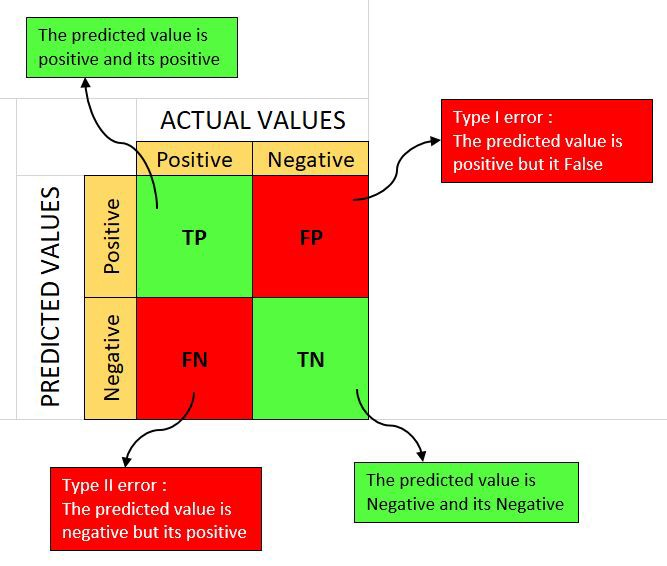

| Values          | Actual Values | Predicted Values |
| :-              | -:            | :-:              |
| True Negatives |  Negative     |  Negative        |
| False Negatives |  Positive     |  Negative        |
| True Positives |  Postive     |  Positive        |
| False Positives |  Negative     |  Positive        |

**PRECISION AND RECALL**

+ Precision = True Positives / (True Positives + False Positives)
+ Precision is the Accuracy of the Positive Predictions.

+ Recall = True Positives / (True Positives + False Negatives)
+ Recall is the Sensitivity or True Positive Rate.

Scikit Learn provides several function to Compute the Classigier Metrics.

In [114]:
from sklearn.metrics import precision_score, recall_score
print("The Precision of the Model :--",precision_score(y_train_5, y_train_pred))
print("The Recall of the Model :--", recall_score(y_train_5, y_train_pred))

The Precision of the Model :-- 0.8370879772350012
The Recall of the Model :-- 0.6511713705958311


Here we say that, The Image which is Classified is 5.

+ Precision = 83%
+ It is correct only 83% of the time.

+ Recall = 65%
+ It is only detecting the 65% of the 5s

**F1-SCORE**

+ Combining both Precision and Recall to get the F1 Score.

+ It is the Harmonic Mean of both Precision and Recall.

In [115]:
## computing f1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

Here the f1 score is 73%

**PRECISION RECALL TRADE OFF**

+ sometimes you would want to rely on single features like precision or recall.

+ like less precision and more recall.

+ or more precision and less recall.

+ For that we will look at the Precision Recall Trade Off.

So, the how is the Positives and Negatives are Defining.

+ there is a threshold, above that threshold, values will be postives.

+ and below the threshold, the values will be negatives.

+ There is Scikit Learn decision_function() method for this.

+ it will return a score for each instance, unlike the predict method().

In [116]:
## getting the score for some_digit
#print(some_digit)
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

There will be a Threshold.

+ So, if the score is grater than the threshold, then we will get the Positives -- True.
+ If the score is less than the threshold, then we will get the Negatives -- False.

+ So Raising the Threshold Value will decrease the Recall.

In [117]:
## Setting the Threshold and find out the mthod.
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print("The threshold is 0, whether it is Negatives or Positives:--",y_some_digit_pred)

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print("The threshold is 8000, whether it is Negatives or Positives:--",y_some_digit_pred)

The threshold is 0, whether it is Negatives or Positives:-- [ True]
The threshold is 8000, whether it is Negatives or Positives:-- [False]


How do we know which Threshold to use ??

+ take the prediction values along with the decision function scores instead of prediction.

In [118]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

With the above scores, use the precision recall curve, to compute precision and recall for all possible threshold.

In [124]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

print("The Precision Values :--",precisions)
print("The Recall Values :--",recalls)
print("The Threshold Values :--",thresholds)

The Precision Values :-- [0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]
The Recall Values :-- [1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
The Threshold Values :-- [-106527.45300471 -105763.22240074 -105406.2965229  ...   38871.26391927
   42216.05562787   49441.43765905]


In [130]:
print(precisions[0])
print(recalls[0])
print(thresholds[0])

0.0904012273621719
1.0
-106527.45300471177


The recall value when the Precision value is 90% and above:--- 0.4799852425751706
The threshold value when the Precision value is 90% and above:--- 3370.0194991439557


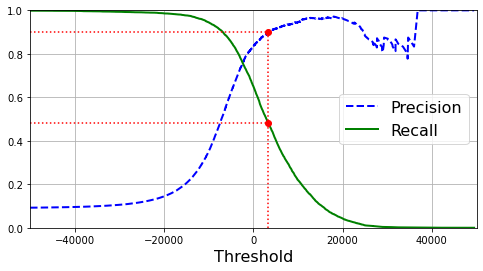

In [148]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)      
    plt.grid(True)                             
    plt.axis([-50000, 50000, 0, 1])


## suppose you are decided to aim for 90% precision.
## so seecting for 90% precision.
## np.argmax give the first index of max value.
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
print("The recall value when the Precision value is 90% and above:---", recall_90_precision)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print("The threshold value when the Precision value is 90% and above:---", threshold_90_precision)


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                 
plt.show()

Plot Precision directly against Recall.

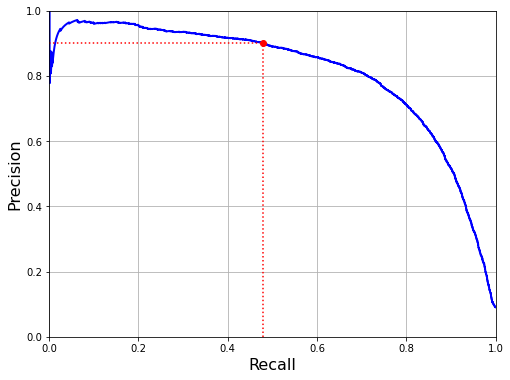

In [150]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [155]:
## suppose you have decided to aim for 90% Precision.
## so search for the lowest threshold that gives you 90% precision.
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]
print(threshold_90_precision)
## evaluate y_train_pred_90 using the above equation.
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(y_train_pred_90)
print(precision_score(y_train_5, y_train_pred_90)) 
print(recall_score(y_train_5, y_train_pred_90))

3370.0194991439557
[False False False ...  True False False]
0.9000345901072293
0.4799852425751706


Here the Score as 
   + Precision = 90%  (HIGH)
   + Recall = 42%  (LOW)
   
High Precision Classifier would not be useful if Recall is Low.

**ROC CURVE**

+ It is the Reciever Operator Characteristics.

+ USed for Binary Classifier.

+ ROC Curve Plots `TRUE POSITIVE RATE VS FALSE POSITIVE RATE`

+ To plot ROC Curve, use roc_curve(), to compute tpr and fpr.


In [162]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
print("False Positive Rate : ---", fpr)
print(len(fpr))
print("True Positive Rate : ---", tpr)
print(len(tpr))
print("Threshold Value : ---", thresholds)
print(len(thresholds))

False Positive Rate : --- [0.         0.         0.         ... 0.99937705 0.99937705 1.        ]
3908
True Positive Rate : --- [0.00000000e+00 1.84467810e-04 9.22339052e-04 ... 9.99815532e-01
 1.00000000e+00 1.00000000e+00]
3908
Threshold Value : --- [  49442.43765905   49441.43765905   36801.60697028 ... -105763.22240074
 -106527.45300471 -146348.56726174]
3908


Plot the FPR vs TPR Curve

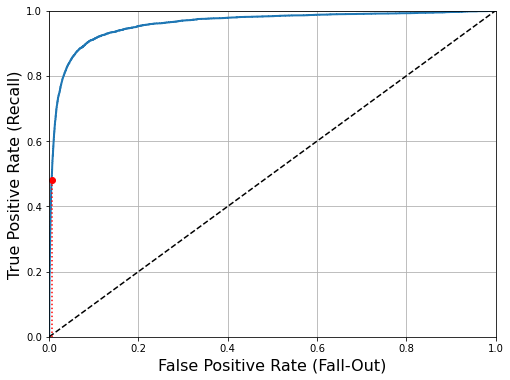

In [163]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                  
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")                                             
plt.show()

+ Higher the Recall, more Flase Positives the Classifier Procduces.

+ The doted line represent the ROC Curve of Purely Random Classifier.

+ A good Classifier Stays as far as Away from the doted line as Possible.

+ Comparing the Different Classifier using AUC (Area Under Curve).

+ Area Under the Perfect Classifier is 1. And a Random Classifier Will have AUC = 0.5

In [164]:
## calculating the AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Here the Area Under the Curve is 0.96

TRAINING RANDOM FOREST CLASSIFIER

In [167]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")
## roc curve function expects labels and scores.
## but instead of score, we can give y_pry_probas_forest
print(y_probas_forest)
y_scores_forest = y_probas_forest[:,1]  # score = proba of positive class
print(y_scores_forest)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
print(fpr_forest)
print(tpr_forest)
print(thresholds_forest)

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.94 0.06]]
[0.89 0.01 0.04 ... 0.98 0.08 0.06]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.83220653e-05 5.49661958e-05 5.49661958e-05 5.49661958e-05
 5.49661958e-05 5.49661958e-05 9.16103263e-05 9.16103263e-05
 1.09932392e-04 1.09932392e-04 1.09932392e-04 1.09932392e-04
 1.28254457e-04 1.28254457e-04 1.64898587e-04 2.19864783e-04
 2.19864783e-04 2.56508914e-04 2.56508914e-04 2.74830979e-04
 2.93153044e-04 2.93153044e-04 3.48119240e-04 3.84763371e-04
 4.21407501e-04 4.39729566e-04 4.58051632e-04 5.13017827e-04
 5.49661958e-04 6.22950219e-04 6.96238480e-04 6.96238480e-04
 7.51204676e-04 8.24492937e-04 8.97781198e-04 1.08100185e-03
 1.13596805e-03 1.28254457e-03 1.42912109e-03 1.52073142e-03
 1.74059620e-03 1.96046098

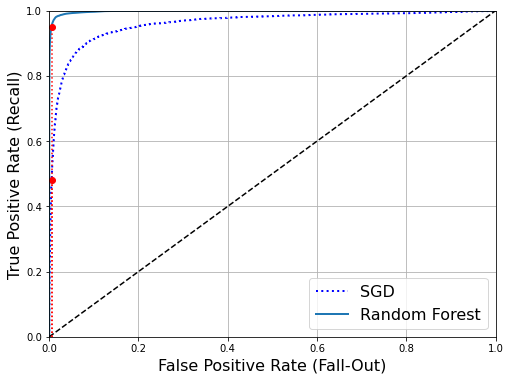

In [168]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [169]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

Here the Score is 0.99

+ We can Conclude that, Random forest is much better Model for the Binary Classification.